In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/LGD_Data.csv',sep= ';')

In [ ]:
pd.set_option('display.max_columns', 1000)

In [ ]:
Data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,janv-85,1.0,NaN,NaN,3,0,13648,83.7,9,f,0.0,0,5861.07,5831.78,5000,861.07,0,0,0,janv-15,171.62,NaN,janv-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0,0,Apr-99,5.0,NaN,NaN,3,0,1687,9.4,4,f,0.0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,sept-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0,nov-01,2.0,NaN,NaN,2,0,2956,98.5,10,f,0.0,0,3003.65,3003.65,2400,603.65,0,0,0,juin-14,649.91,NaN,janv-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0,0,Feb-96,1.0,35,NaN,10,0,5598,21,37,f,0.0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,janv-15,357.48,NaN,janv-15,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,janv-96,0.0,38,NaN,15,0,27783,53.9,38,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,janv-16,67.79,Feb-16,janv-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data.shape

(466285, 81)

In [ ]:
Data.isnull().sum()

Unnamed: 0          0
id                  0
member_id           0
loan_amnt           0
funded_amnt         0
                ...  
Unnamed: 76    466284
Unnamed: 77    466285
Unnamed: 78    466285
Unnamed: 79    466285
Unnamed: 80    466284
Length: 81, dtype: int64

In [ ]:
Data.columns.values.tolist()

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [ ]:
half_count = len(Data) / 2

Df=Data.dropna(axis=1,how='all', inplace=False, thresh=half_count)

In [ ]:
Df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0,janv-85,1.0,3,0,13648,83.7,9,f,0.0,0,5861.07,5831.78,5000,861.07,0,0,0,janv-15,171.62,NaN,janv-16,0.0,1.0,INDIVIDUAL,0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.0,0,Apr-99,5.0,3,0,1687,9.4,4,f,0.0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,sept-13,0.0,1.0,INDIVIDUAL,0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0,nov-01,2.0,2,0,2956,98.5,10,f,0.0,0,3003.65,3003.65,2400,603.65,0,0,0,juin-14,649.91,NaN,janv-16,0.0,1.0,INDIVIDUAL,0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.0,0,Feb-96,1.0,10,0,5598,21,37,f,0.0,0,12226.3,12226.3,10000,2209.33,16.97,0,0,janv-15,357.48,NaN,janv-15,0.0,1.0,INDIVIDUAL,0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0,janv-96,0.0,15,0,27783,53.9,38,f,766.9,766.9,3242.17,3242.17,2233.1,1009.07,0,0,0,janv-16,67.79,Feb-16,janv-16,0.0,1.0,INDIVIDUAL,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,janv-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,773xx,TX,19.85,0,Apr-03,2,18,0,23208,77.6,36,w,12574,12574,10383.4,10383.4,5826,4557.36,0,0,0,janv-16,432.64,Feb-16,janv-16,0,1.0,INDIVIDUAL,0,0.0,294998,29900
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,janv-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,377xx,TN,18.45,0,juin-97,5,18,1,18238,46.3,30,f,0,0,4677.92,4677.92,1837.04,2840.88,0,0,0,Dec-14,17.5,NaN,janv-16,0,1.0,INDIVIDUAL,0,0.0,221830,39400
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,janv-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,458xx,OH,25.65,0,Dec-01,2,18,0,6688,51.1,43,f,14428.3,14428.3,12344,12344,6271.69,6072.29,0,0,0,janv-16,514.34,Feb-16,Dec-15,0,1.0,INDIVIDUAL,0,0.0,73598,13100
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,janv-14,Fully Paid,

In [ ]:
Df.shape

(466285, 54)

In [ ]:
Df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
Df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,policy_code,tot_coll_amt
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662230e+05,461416.000000,3.937430e+05
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327603e+04,1.094346,1.925231e+02
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496437e+04,60.483597,1.467208e+04
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000e+00
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,1.000000,0.000000e+00
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,1.000000,0.000000e+00
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.894350e+04,1.000000,0.000000e+00
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,41014.150000,9.152545e+06


In [ ]:
Df.isnull().sum()/466262*100

Unnamed: 0                     0.000000
id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.916845
emp_length                     4.518061
home_ownership                 0.012439
annual_inc                     0.013297
verification_status            0.012439
issue_d                        0.012439
loan_status                    0.012439
pymnt_plan                     0.012439
url                            0.012439
purpose                        1.033754
title                          1.040831
zip_code                       1.041260
addr_state                     1.041046
dti                            1.041260


In [ ]:
Df.dtypes

Unnamed: 0                      int64
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                            object
delinq_2yrs                    object
earliest_cr_

In [ ]:
print("Data types and their frequency\n{}".format(Df.dtypes.value_counts()))

Data types and their frequency
object     43
float64     6
int64       5
dtype: int64


In [ ]:
columns_to_delete = ['emp_title','url','issue_d','pymnt_plan','purpose','title','initial_list_status','last_pymnt_d','policy_code','last_credit_pull_d','Unnamed: 0','id','member_id','earliest_cr_line','verification_status']
Df.drop(columns_to_delete, inplace=True, axis=1)


In [ ]:
Df.zip_code[218720:218750]

218720    debt_consolidation
218721                 997xx
218722                 334xx
218723                 288xx
218724                 060xx
218725                 house
218726                 016xx
218727                 113xx
218728                 926xx
218729                 902xx
218730                 941xx
218731                 918xx
218732                 195xx
218733                 100xx
218734                 236xx
218735                 243xx
218736                 917xx
218737        small_business
218738                 890xx
218739                 100xx
218740                 018xx
218741                 925xx
218742                 705xx
218743                 809xx
218744                 921xx
218745                 706xx
218746                 720xx
218747                 782xx
218748                 898xx
218749                 337xx
Name: zip_code, dtype: object

In [ ]:
import re
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [ ]:
zip_code_index = Df.columns.get_loc("zip_code")
for ind in Df.index:
    cell_value = Df.iat[ind, zip_code_index]
    if isinstance(cell_value, str):
        value = re.search("^[0-9]{3}xx", cell_value)
        if value is None:
            current_index = zip_code_index
            while current_index < (Df.iloc[ind, :]).size - 1:
                try:
                    Df.iat[ind, current_index] = Df.iat[ind, current_index + 1]
                except:
                    print("error converting value")
                current_index = current_index + 1

error converting value
error converting value
error converting value


In [ ]:
Df.zip_code[218720:218750]

218720    327xx
218721    997xx
218722    334xx
218723    288xx
218724    060xx
218725    109xx
218726    016xx
218727    113xx
218728    926xx
218729    902xx
218730    941xx
218731    918xx
218732    195xx
218733    100xx
218734    236xx
218735    243xx
218736    917xx
218737    349xx
218738    890xx
218739    100xx
218740    018xx
218741    925xx
218742    705xx
218743    809xx
218744    921xx
218745    706xx
218746    720xx
218747    782xx
218748    898xx
218749    337xx
Name: zip_code, dtype: object

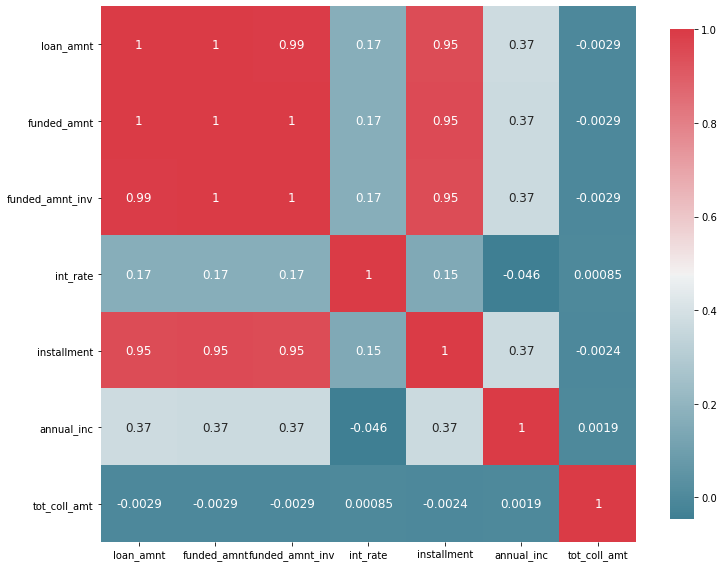

In [ ]:
def plot_correlation_map( Df ):

    corr = Df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map( Df )

In [ ]:
columns_to_delete = ['funded_amnt','funded_amnt_inv']
Df.drop(columns_to_delete, inplace=True, axis=1)

# categorical values

In [ ]:
Df["loan_status"].value_counts()

Current                                                224196
Fully Paid                                             184716
Charged Off                                             42470
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = Df["loan_status"].value_counts().index, Df["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

,Loan Status,Count,Meaning
0,Current,224196,Loan has been fully paid off.
1,Fully Paid,184716,Loan for which there is no longer a reasonable...
2,Charged Off,42470,"While the loan was paid off, the loan applicat..."
3,Late (31-120 days),6900,"While the loan was charged off, the loan appli..."
4,In Grace Period,3146,Loan is up to date on current payments.
5,Does not meet the credit policy. Status:Fully ...,1988,The loan is past due but still in the grace pe...
6,Late (16-30 days),1218,Loan hasn't been paid in 31 to 120 days (late ...
7,Default,832,Loan hasn't been paid in 16 to 30 days (late o...
8,Does not meet the credit policy. Status:Charge...,761,Loan is defaulted on and no payment has been m...


In [ ]:
Df = Df[(Df["loan_status"] == "Fully Paid") |
(Df["loan_status"] == "Charged Off")]
mapping_dictionary = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1}}
Df = Df.replace(mapping_dictionary)

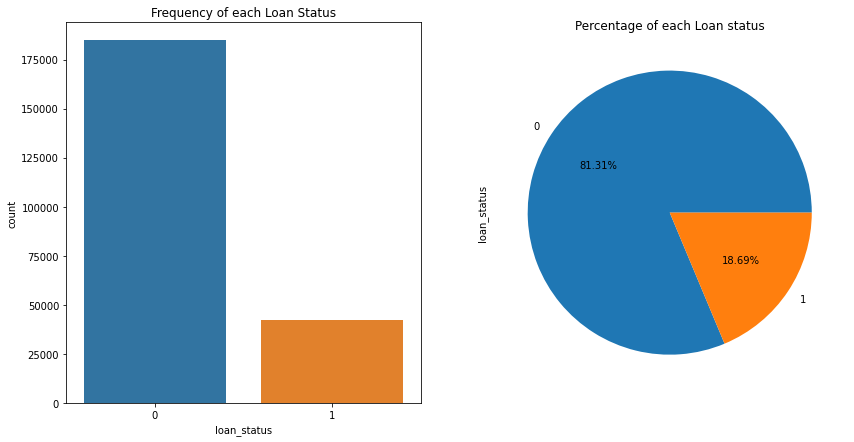

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=Df,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
Df.loan_status.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [ ]:
list_grades = ["A" , "B", "C", "D", "E", "F", "G"]
Df["grade"] = pd.Categorical(Df["grade"] , categories = list_grades, ordered = True)
Df.sort_values ('grade', inplace = True)

In [ ]:
Df[["loan_status", "grade"]].groupby(["grade"], as_index=True).mean()

,loan_status
grade,
A,0.064806
B,0.130597
C,0.206458
D,0.272040
E,0.350719
F,0.406141
G,0.441677


In [ ]:
mapping_dict = {
"grade":{
"A": 1,
"B": 2,
"C": 3,
"D": 4,
"E": 5,
"F": 6,
"G": 7
},
}
Df = Df.replace(mapping_dict)
Df[["grade"]]

,grade
466283,1
177297,1
311113,1
30252,1
177300,1
...,...
281062,7
130080,7
280969,7
221954,7


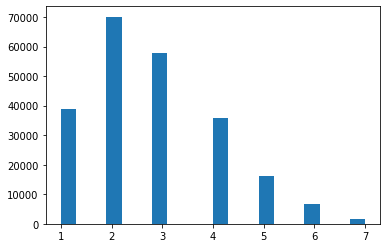

In [ ]:
plt.hist(Df.grade,bins=20)
plt.show()

In [ ]:
Df['sub_grade'].value_counts()

B3    16943
B4    15585
B2    13550
C1    13387
B5    12898
C2    12712
C3    11250
B1    11133
A5    10869
C4    10533
A4    10258
C5     9849
D1     8877
D2     8112
D3     7077
A3     6680
D4     6476
A2     5703
A1     5468
D5     5291
E1     3937
E2     3897
E3     3202
E4     2834
E5     2408
F1     1890
F2     1510
F3     1357
F4     1035
F5      819
G1      585
G2      421
G3      271
G4      200
G5      169
Name: sub_grade, dtype: int64

In [ ]:
# Understanding grades better
# Bivariate Analysis on sub grade against Chargedoff_Proportion
grade_vs_loan = Df.groupby(['sub_grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan[1] + grade_vs_loan[0] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan[1] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)
# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"

loan_status,sub_grade,0,1,Total,Chargedoff_Proportion
32,G3,144,127,271,0.468635
30,G1,313,272,585,0.464957
29,F5,440,379,819,0.462759
34,G5,91,78,169,0.461538
28,F4,584,451,1035,0.435749
31,G2,242,179,421,0.425178
27,F3,788,569,1357,0.419307
24,E5,1470,938,2408,0.389535
26,F2,927,583,1510,0.386093
25,F1,1187,703,1890,0.371958


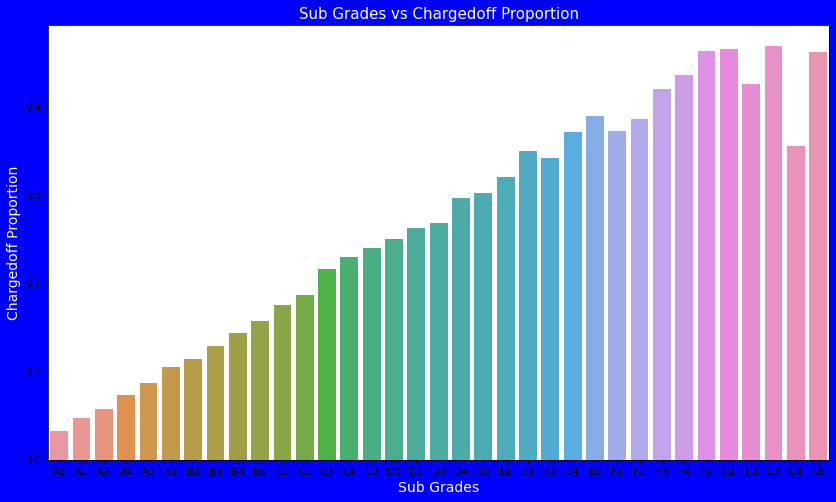

In [ ]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Sub Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='sub_grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Sub Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# sub Grades of "A" has very less chances of charged off.
# sub Grades of "F" and "G" have very high chances of charged off.
# proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"


In [ ]:
mapping_dict = {
"sub_grade":{
"A1": 11,
"A2": 12,
"A3": 13,
"A4": 14,
"A5": 15,
"B1": 21,
"B2": 22,
"B3": 23,
"B4": 24,
"B5": 25,
"C1": 31,
"C2": 32,
"C3": 33,
"C4": 34,
"C5": 35,
"D1": 41,
"D2": 42,
"D3": 43,
"D4": 44,
"D5": 45,
"E1": 51,
"E2": 52,
"E3": 53,
"E4": 54,
"E5": 55,
"F1": 61,
"F2": 62,
"F3": 63,
"F4": 64,
"F5": 65,
"G1": 71,
"G2": 72,
"G3": 73,
"G4": 74,
"G5": 75
},
}
Df = Df.replace(mapping_dict)
Df[["sub_grade"]].head()

,sub_grade
466283,14
177297,14
311113,13
30252,13
177300,12


In [ ]:
Df.loc[(Df.home_ownership == 'ANY') | (Df.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'

In [ ]:
dummy=pd.get_dummies(Df['home_ownership'])
dummy.head()

,MORTGAGE,OTHER,OWN,RENT
466283,0,0,1,0
177297,1,0,0,0
311113,0,0,0,1
30252,1,0,0,0
177300,1,0,0,0


In [ ]:
Df=pd.concat([Df, dummy], axis =1)
Df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT
466283,2000,36 months,7.90,62.59,1,14,3 years,OWN,83000.0,0,913xx,CA,5.39,3,1,21,0,11404,21.5,27,0,0,2126.58,2126.58,2000,126.58,0,0,0,1500.68,NaN,0,INDIVIDUAL,0,0.0,591610,53100,0,0,1,0
177297,12000,36 months,7.90,375.49,1,14,9 years,MORTGAGE,64000.0,0,482xx,MI,12.96,0,0,14,0,3232,12,25,0,0,13465.8,13465.8,12000,1465.8,0,0,0,2952.08,NaN,0,INDIVIDUAL,0,0.0,155573,27000,1,0,0,0
311113,14000,36 months,7.12,433.05,1,13,7 years,RENT,62525.0,0,953xx,CA,16.56,0,0,8,0,18780,74.2,24,0,0,14968.8,14968.8,14000,968.79,0,0,0,1906.09,NaN,0,INDIVIDUAL,0,0.0,45592,25300,0,0,0,1
30252,1500,36 months,7.14,46.41,1,13,4 years,MORTGAGE,45000.0,0,535xx,WI,4.8,0.0,1.0,5,0,5588,39.1,29,0,0.0,1670.54,1670.54,1500.0,170.54,0,0,0.0,49.42,NaN,0,INDIVIDUAL,0,NaN,NaN,NaN,1,0,0,0
177300,2600,36 months,6.62,79.83,1,12,10+ years,MORTGAGE,120000.0,0,762xx,TX,16.67,0,1,17,0,19607,22.4,39,0,0,2848.47,2848.47,2600,248.47,0,0,0,938.71,NaN,0,INDIVIDUAL,0,0.0,184272,87430,1,0,0,0


In [ ]:

Df.drop('home_ownership',axis='columns', inplace=True)

In [ ]:
set(Df['term'])

{' 36 months', ' 60 months'}

In [ ]:
Df['term'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Df['term'] = Df['term'].astype(int)
set(Df["term"])

{36, 60}

In [ ]:
Df['emp_length'].value_counts()

10+ years    68025
2 years      21236
< 1 year     18788
3 years      18428
5 years      16596
1 year       15156
4 years      14691
6 years      13657
7 years      12882
8 years      10535
9 years       8519
Name: emp_length, dtype: int64

In [ ]:
display(set(Df["emp_length"]))
Df.replace('n/a', np.nan,inplace=True)

{'1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year',
 nan}

In [ ]:
Df.emp_length.fillna(value=0,inplace=True)
set(Df["emp_length"])

{0,
 '1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year'}

In [ ]:
Df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Df['emp_length'] = Df['emp_length'].astype(int)
set(Df["emp_length"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

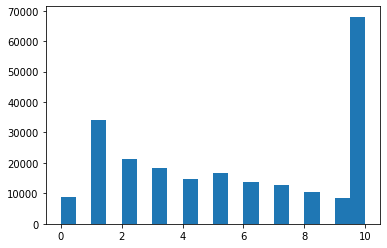

In [ ]:
plt.hist(Df.emp_length,bins=20)
plt.show()

In [ ]:
for year in Df.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{Df[Df.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

3 years in this position:
0    0.819025
1    0.180975
Name: loan_status, dtype: float64
9 years in this position:
0    0.805963
1    0.194037
Name: loan_status, dtype: float64
7 years in this position:
0    0.808648
1    0.191352
Name: loan_status, dtype: float64
4 years in this position:
0    0.823702
1    0.176298
Name: loan_status, dtype: float64
10 years in this position:
0    0.818376
1    0.181624
Name: loan_status, dtype: float64
8 years in this position:
0    0.806834
1    0.193166
Name: loan_status, dtype: float64
5 years in this position:
0    0.817185
1    0.182815
Name: loan_status, dtype: float64
0 years in this position:
0    0.732273
1    0.267727
Name: loan_status, dtype: float64
6 years in this position:
0    0.811379
1    0.188621
Name: loan_status, dtype: float64
2 years in this position:
0    0.821059
1    0.178941
Name: loan_status, dtype: float64
1 years in this position:
0    0.814253
1    0.185747
Name: loan_status, dtype: float64


In [ ]:
Df.drop('emp_length',axis=1,inplace=True)

In [ ]:
#Charge off rates are extremely similar across all employment lengths. So we are going to drop the `emp_length` column.

In [ ]:
print("Data types and their frequency\n{}".format(Df.dtypes.value_counts()))

Data types and their frequency
object     26
int64       5
float64     4
uint8       4
dtype: int64


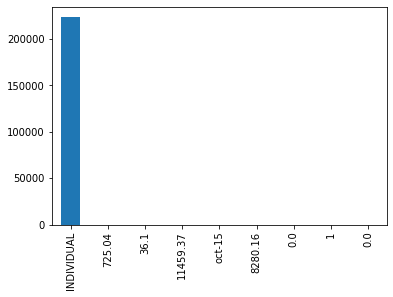

In [ ]:
fig, ax = plt.subplots()
Df['application_type'].value_counts().plot(ax=ax, kind='bar')

In [ ]:

columns_to_delete = ['application_type','addr_state','zip_code']
Df.drop(columns_to_delete, inplace=True, axis=1)

# Transform objects into floats

In [ ]:
object_columns_df = Df.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

dti                              5.39
delinq_2yrs                         3
inq_last_6mths                      1
open_acc                           21
pub_rec                             0
revol_bal                       11404
revol_util                       21.5
total_acc                          27
out_prncp                           0
out_prncp_inv                       0
total_pymnt                   2126.58
total_pymnt_inv               2126.58
total_rec_prncp                  2000
total_rec_int                  126.58
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt               1500.68
next_pymnt_d                      NaN
collections_12_mths_ex_med          0
acc_now_delinq                      0
tot_cur_bal                    591610
total_rev_hi_lim                53100
Name: 466283, dtype: object


In [ ]:
Df.isnull().sum()/227182*100

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
annual_inc                     0.000000
loan_status                    0.000000
dti                            1.681911
delinq_2yrs                    1.681471
inq_last_6mths                 1.687634
open_acc                       1.681911
pub_rec                        1.681031
revol_bal                      1.681031
revol_util                     1.761583
total_acc                      1.682352
out_prncp                      1.681471
out_prncp_inv                  1.681911
total_pymnt                    1.681471
total_pymnt_inv                1.681031
total_rec_prncp                1.681031
total_rec_int                  1.681031
total_rec_late_fee             1.681031
recoveries                     1.681031
collection_recovery_fee        1.681911


In [ ]:
Df_naive=Df.copy()

In [ ]:
columns_to_delete = ['next_pymnt_d']
Df.drop(columns_to_delete, inplace=True, axis=1)

In [ ]:
set(Df['recoveries'].values)

{0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 10.0,
 11.25,
 12.0,
 13.0,
 15.25,
 16.25,
 21.5,
 20.0,
 16.75,
 24.0,
 16.0,
 17.5,
 27.75,
 22.5,
 22.0,
 23.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 40.0,
 33.0,
 34.56,
 35.56,
 37.0,
 45.31,
 38.94,
 43.19,
 39.69,
 49.75,
 10.5,
 52.0,
 53.44,
 11.0,
 '1556.37',
 60.06,
 61.56,
 60.0,
 12.75,
 64.75,
 12.5,
 13.5,
 13.25,
 68.06,
 69.75,
 68.31,
 71.56,
 14.75,
 73.81,
 72.56,
 75.87,
 75.0,
 15.5,
 78.5,
 71.12,
 73.87,
 81.62,
 15.0,
 83.25,
 84.25,
 85.43,
 84.06,
 85.62,
 80.25,
 89.06,
 89.62,
 91.62,
 18.0,
 93.93,
 94.93,
 93.32,
 19.0,
 96.88,
 98.69,
 99.94,
 100.0,
 101.32,
 98.25,
 103.0,
 98.0,
 98.18,
 104.43,
 107.0,
 107.62,
 109.37,
 110.68,
 '726.61',
 112.5,
 112.37,
 114.43,
 115.43,
 116.25,
 117.93,
 116.0,
 111.18,
 118.18,
 121.43,
 122.56,
 115.5,
 124.25,
 125.93,
 25.0,
 121.32,
 128.11,
 129.69,
 130.5,
 128.06,
 132.51,
 133.75,
 134.12,
 135.1

In [ ]:
recoveries = Df['recoveries'].tolist()
for rec in recoveries:
    try : 
        float(rec)
        
    except :
        print(rec)

Feb-92
Card Consolidation Loan
Feb-87
f


In [ ]:
Df = Df[Df.recoveries != 'Card Consolidation Loan']
Df = Df[Df.recoveries != 'Feb-87']
Df = Df[Df.recoveries != 'f']
Df = Df[Df.recoveries != 'Feb-92']

In [ ]:
Df['recoveries'] = Df['recoveries'].astype(float)

In [ ]:
revol_util = Df['revol_util'].tolist()
for rec in revol_util:
    try : 
        float(rec)
        
    except :
        print(rec)

nov-86


In [ ]:
Df = Df[Df.revol_util != 'nov-86']

In [ ]:
Df['revol_util'] = Df['revol_util'].astype(float)

In [ ]:
dti = Df['dti'].tolist()
for rec in dti:
    try : 
        float(rec)
        
    except :
        print(rec)

OR
29.99%<br>Card 7


In [ ]:
Df = Df[Df.dti != 'OR']
Df = Df[Df.dti != '29.99%<br>Card 7']

In [ ]:
collections_12_mths_ex_med = Df['collections_12_mths_ex_med'].tolist()
for rec in collections_12_mths_ex_med:
    try : 
        float(rec)
        
    except :
        print(rec)

janv-16


In [ ]:
Df = Df[Df.collections_12_mths_ex_med != 'janv-16']


In [ ]:
collection_recovery_fee = Df['collection_recovery_fee'].tolist()
for rec in collection_recovery_fee:
    try : 
        float(rec)
        
    except :
        print(rec)

janv-15
oct-12
juin-13
Dec-11
Dec-14
May-15
juil-13
May-15
May-14
May-15
May-15
Aug-14
sept-12
Apr-13


In [ ]:
Df = Df[Df.collection_recovery_fee != 'Dec-14']
Df = Df[Df.collection_recovery_fee != 'Dec-11']
Df = Df[Df.collection_recovery_fee != 'janv-15']
Df = Df[Df.collection_recovery_fee != 'juin-13']
Df = Df[Df.collection_recovery_fee != 'oct-12']
Df = Df[Df.collection_recovery_fee != 'May-15']
Df = Df[Df.collection_recovery_fee != 'May-14']
Df = Df[Df.collection_recovery_fee != 'juil-13']
Df = Df[Df.collection_recovery_fee != 'May-15']
Df = Df[Df.collection_recovery_fee != 'Aug-14']
Df = Df[Df.collection_recovery_fee != 'Apr-13']
Df = Df[Df.collection_recovery_fee != 'sept-12']

In [ ]:
Df['dti'] = Df['dti'].astype(float)
Df['total_rev_hi_lim'] = Df['total_rev_hi_lim'].astype(float)
Df['tot_cur_bal'] = Df['tot_cur_bal'].astype(float)
Df['acc_now_delinq'] = Df['acc_now_delinq'].astype(float)
Df['last_pymnt_amnt'] = Df['last_pymnt_amnt'].astype(float)
Df['total_pymnt'] = Df['total_pymnt'].astype(float)
Df['total_pymnt_inv'] = Df['total_pymnt_inv'].astype(float)
Df['total_rec_prncp'] = Df['total_rec_prncp'].astype(float)
Df['delinq_2yrs'] = Df['delinq_2yrs'].astype(float)
Df['pub_rec'] = Df['pub_rec'].astype(float)
Df['collections_12_mths_ex_med'] = Df['collections_12_mths_ex_med'].astype(float)
Df['collection_recovery_fee'] = Df['collection_recovery_fee'].astype(float)
Df['total_rec_late_fee'] = Df['total_rec_late_fee'].astype(float)
Df['total_rec_int'] = Df['total_rec_int'].astype(float)
Df['out_prncp_inv'] = Df['out_prncp_inv'].astype(float)
Df['out_prncp'] = Df['out_prncp'].astype(float)
Df['out_prncp'] = Df['out_prncp'].astype(float)
Df['total_acc'] = Df['total_acc'].astype(float)
Df['revol_bal'] = Df['revol_bal'].astype(float)
Df['open_acc'] = Df['open_acc'].astype(float)
Df['inq_last_6mths'] = Df['inq_last_6mths'].astype(float)

In [ ]:
print("Data types and their frequency\n{}".format(Df.dtypes.value_counts()))

Data types and their frequency
float64    26
int64       5
uint8       4
dtype: int64


In [ ]:
#Df_naive=Df.copy()

In [ ]:
#Df_naive.head()

# Handling missing values 


In [ ]:
Df = Df[[ col for col in Df.columns if col != 'loan_status' ] + ['loan_status']]
Df

,loan_amnt,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,loan_status
466283,2000,36,7.90,62.59,1,14,83000.0,5.39,3.0,1.0,21.0,0.0,11404.0,21.5,27.0,0.0,0.0,2126.579838,2126.58,2000.00,126.58,0.0,0.00,0.0000,1500.68,0.0,0.0,0.0,591610.0,53100.0,0,0,1,0,0
177297,12000,36,7.90,375.49,1,14,64000.0,12.96,0.0,0.0,14.0,0.0,3232.0,12.0,25.0,0.0,0.0,13465.800000,13465.80,12000.00,1465.80,0.0,0.00,0.0000,2952.08,0.0,0.0,0.0,155573.0,27000.0,1,0,0,0,0
311113,14000,36,7.12,433.05,1,13,62525.0,16.56,0.0,0.0,8.0,0.0,18780.0,74.2,24.0,0.0,0.0,14968.790000,14968.79,14000.00,968.79,0.0,0.00,0.0000,1906.09,0.0,0.0,0.0,45592.0,25300.0,0,0,0,1,0
30252,1500,36,7.14,46.41,1,13,45000.0,4.80,0.0,1.0,5.0,0.0,5588.0,39.1,29.0,0.0,0.0,1670.540000,1670.54,1500.00,170.54,0.0,0.00,0.0000,49.42,0.0,0.0,NaN,NaN,NaN,1,0,0,0,0
177300,2600,36,6.62,79.83,1,12,120000.0,16.67,0.0,1.0,17.0,0.0,19607.0,22.4,39.0,0.0,0.0,2848.468471,2848.47,2600.00,248.47,0.0,0.00,0.0000,938.71,0.0,0.0,0.0,184272.0,87430.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281062,10000,60,25.83,298.40,7,72,52000.0,12.49,0.0,2.0,5.0,0.0,5124.0,78.8,6.0,0.0,0.0,1477.650000,1477.65,434.04,1043.61,0.0,0.00,0.0000,298.40,0.0,0.0,0.0,24968.0,6500.0,0,0,0,1,1
130080,25200,60,24.89,738.03,7,73,86000.0,21.43,0.0,6.0,33.0,0.0,23734.0,18.8,45.0,0.0,0.0,32967.603290,32934.91,25200.00,7767.60,0.0,0.00,0.0000,21902.83,0.0,0.0,0.0,73488.0,126500.0,1,0,0,0,0
280969,30000,60,25.80,894.67,7,71,91000.0,21.83,1.0,1.0,13.0,2.0,12506.0,47.7,29.0,0.0,0.0,8317.520000,8303.66,2450.29,5867.23,0.0,0.00,0.0000,894.67,0.0,0.0,0.0,334005.0,26200.0,1,0,0,0,1
221954,30000,60,24.33,868.80,7,72,135000.0,11.24,1.0,0.0,12.0,0.0,41592.0,95.8,31.0,0.0,0.0,33014.400000,33014.40,14691.10,18290.74,0.0,32.56,5.8608,868.80,0.0,0.0,NaN,NaN,NaN,0,0,0,1,1


In [ ]:
Df.shape

(227164, 35)

In [ ]:
Df.isnull().sum()/227164*100

loan_amnt                      0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
annual_inc                     0.000000
dti                            1.681164
delinq_2yrs                    1.681164
inq_last_6mths                 1.681164
open_acc                       1.681164
pub_rec                        1.681164
revol_bal                      1.681164
revol_util                     1.760842
total_acc                      1.681164
out_prncp                      1.681164
out_prncp_inv                  1.681164
total_pymnt                    1.681164
total_pymnt_inv                1.681164
total_rec_prncp                1.681164
total_rec_int                  1.681164
total_rec_late_fee             1.681164
recoveries                     1.681164
collection_recovery_fee        1.681164
last_pymnt_amnt                1.681164


In [ ]:
for col in Df.columns:
    Df[col].fillna(Df[col].mean(),inplace=True)

In [ ]:
Df.isnull().sum()/227164*100

loan_amnt                     0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
annual_inc                    0.0
dti                           0.0
delinq_2yrs                   0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int                 0.0
total_rec_late_fee            0.0
recoveries                    0.0
collection_recovery_fee       0.0
last_pymnt_amnt               0.0
collections_12_mths_ex_med    0.0
acc_now_delinq                0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_l

# Handling outliers

In [ ]:
Q1 = Df.quantile(0.25)
Q3 = Df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

loan_amnt                      10800.000000
term                               0.000000
int_rate                           5.710000
installment                      306.090000
grade                              2.000000
sub_grade                         19.000000
annual_inc                     41000.000000
dti                               10.910000
delinq_2yrs                        0.000000
inq_last_6mths                     1.000000
open_acc                           6.000000
pub_rec                            0.000000
revol_bal                      12819.250000
revol_util                        36.500000
total_acc                         15.000000
out_prncp                          0.000000
out_prncp_inv                      0.000000
total_pymnt                    11766.912500
total_pymnt_inv                11741.605000
total_rec_prncp                10675.000000
total_rec_int                   1866.610000
total_rec_late_fee                 0.000000
recoveries                      

In [ ]:
Dfout=(Df < (Q1 - 1.5 * IQR)) |Df > (Q3 + 1.5 * IQR)
outliers=[]


for col in Df.columns :
    
    f=Dfout[col].value_counts(normalize=True)[0]*100
    outliers.append(f)
outliers

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 82.7340599742917,
 100.0,
 100.0,
 86.9979398144072,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 95.59613319011815,
 88.00294060678628,
 88.49333521156521,
 100.0,
 97.76240953672237,
 98.05911147893151,
 100.0,
 100.0,
 100.0,
 100.0,
 99.91856103960134,
 91.60166223521333,
 100.0,
 81.30513637724287]

In [ ]:
Dfout

,loan_amnt,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,loan_status
466283,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
177297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
311113,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30252,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
177300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281062,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
130080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
280969,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
221954,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
dataframe=pd.DataFrame({'variable':Df.columns,
                       'Non outliers': outliers})
dataframe

,variable,Non outliers
0,loan_amnt,100.000000
1,term,100.000000
2,int_rate,100.000000
3,installment,100.000000
4,grade,100.000000
5,sub_grade,100.000000
6,annual_inc,100.000000
7,dti,100.000000
8,delinq_2yrs,82.734060
9,inq_last_6mths,100.000000


In [ ]:
print(Df['delinq_2yrs'].skew())
Df['delinq_2yrs'].describe()

5.850797423698214


count    227164.000000
mean          0.243901
std           0.718140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [ ]:
#The skewness value of 5.85 shows that the variable 'delinq_2yrs' has a right-skewed distribution, indicating the presence of extreme higher values. The maximum 'delinq_2yrs' value is 29 proves this point.

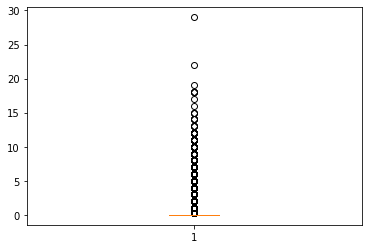

In [ ]:
plt.boxplot(Df["delinq_2yrs"])
plt.show()

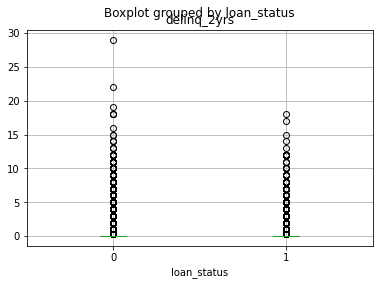

In [ ]:
Df.boxplot(column='delinq_2yrs', by='loan_status')

In [ ]:
#The output shows that the number of outliers is higher for rejected loan applicants (denoted by the label '0') than for approved applicants (denoted by the label '1')

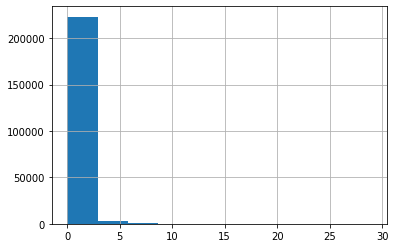

In [ ]:
Df.delinq_2yrs.hist()

In [ ]:
#The above chart shows that the distribution is right-skewed, and there are extreme higher values at the right of the histogram. 

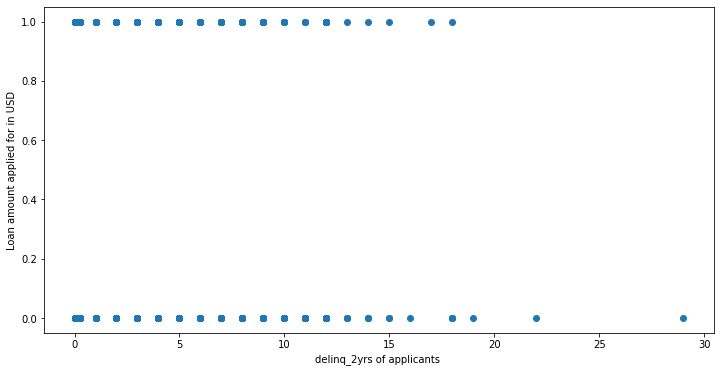

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Df['delinq_2yrs'], Df['loan_status'])
ax.set_xlabel('delinq_2yrs of applicants ')
ax.set_ylabel('Loan amount applied for in USD')
plt.show()

In [ ]:
print(Df['delinq_2yrs'].quantile(0.10))
print(Df['delinq_2yrs'].quantile(0.90))

0.0
1.0


In [ ]:
Df["log_delinq_2yrs"] = Df["delinq_2yrs"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['delinq_2yrs'].skew())
print(Df['log_delinq_2yrs'].skew())

5.850797423698214
0.36073790536216843


In [ ]:
Df['delinq_2yrs'].describe()

count    227164.000000
mean          0.243901
std           0.718140
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          29.000000
Name: delinq_2yrs, dtype: float64

In [ ]:
Df['log_delinq_2yrs'].describe()

count    227164.000000
mean          0.020704
std           0.284470
min          -1.410994
25%           0.000000
50%           0.000000
75%           0.000000
max           3.367296
Name: log_delinq_2yrs, dtype: float64

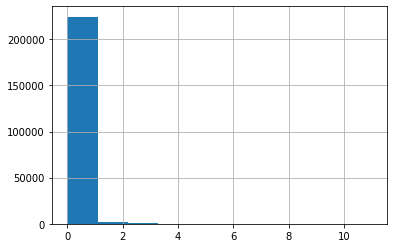

In [ ]:
Df.pub_rec.hist()

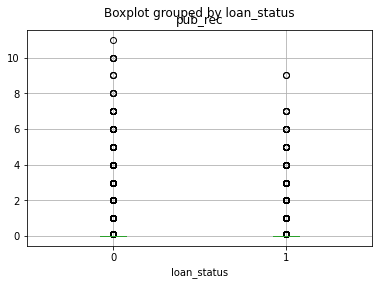

In [ ]:
Df.boxplot(column='pub_rec', by='loan_status')

In [ ]:
Df["Log_pub_rec"] = Df["pub_rec"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['pub_rec'].skew())
print(Df['Log_pub_rec'].skew())

5.000963495295038
-5.529072760367706


In [ ]:
Df.drop('pub_rec', inplace=True, axis=1)
Df.drop('Log_pub_rec', inplace=True, axis=1)

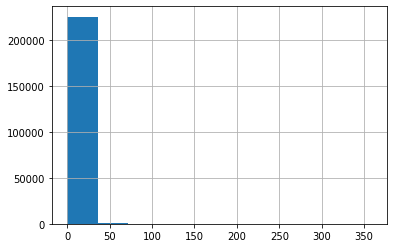

In [ ]:
Df.total_rec_late_fee.hist()

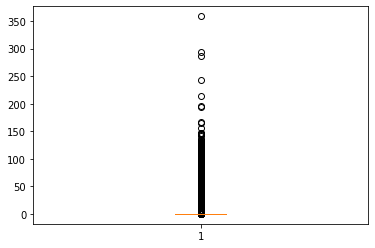

In [ ]:
plt.boxplot(Df["total_rec_late_fee"])
plt.show()

In [ ]:
Df["total_rec_late_fee"].values

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
Df["total_rec_late_fee"].describe()

count    227164.000000
mean          0.768189
std           5.599185
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         358.680000
Name: total_rec_late_fee, dtype: float64

In [ ]:
Df["Log_total_rec_late_fee"] = Df["total_rec_late_fee"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['total_rec_late_fee'].skew())
print(Df['Log_total_rec_late_fee'].skew())

13.006298198350535
6.004602058941977


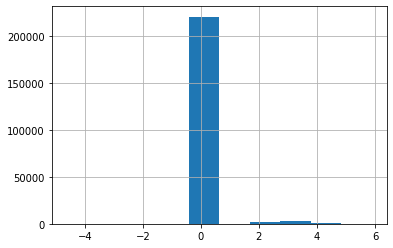

In [ ]:
Df.Log_total_rec_late_fee.hist()

In [ ]:
Df["Log_acc_now_delinq"] = Df["acc_now_delinq"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['acc_now_delinq'].skew())
print(Df['Log_acc_now_delinq'].skew())

26.621349700871747
-7.514338966070047


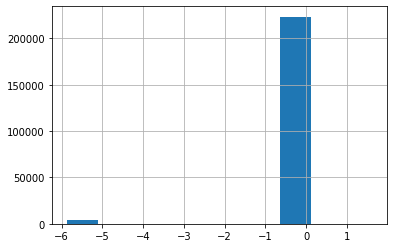

In [ ]:
Df.Log_acc_now_delinq.hist()

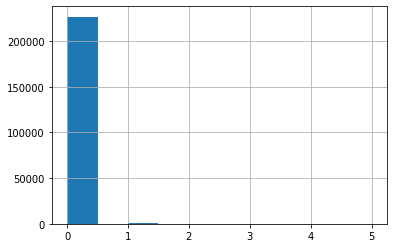

In [ ]:
Df.acc_now_delinq.hist()


In [ ]:
Df.drop('acc_now_delinq', inplace=True, axis=1)
Df.drop('Log_acc_now_delinq', inplace=True, axis=1)

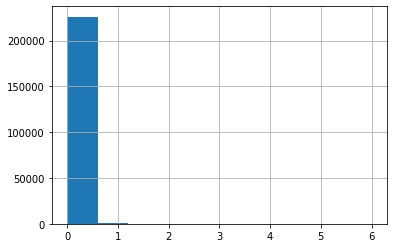

In [ ]:
Df.collections_12_mths_ex_med.hist()

In [ ]:
Df["Log_collections_12_mths_ex_med"] = Df["collections_12_mths_ex_med"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['collections_12_mths_ex_med'].skew())
print(Df['Log_collections_12_mths_ex_med'].skew())


17.986091892794228
-7.454016572277228


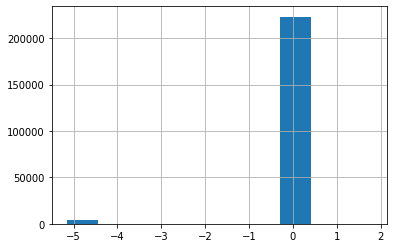

In [ ]:
Df.Log_collections_12_mths_ex_med.hist()

In [ ]:
Df.drop('collections_12_mths_ex_med', inplace=True, axis=1)
Df.drop('Log_collections_12_mths_ex_med', inplace=True, axis=1)

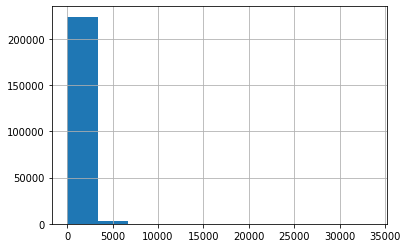

In [ ]:
Df.recoveries.hist()

In [ ]:
Df["Log_recoveries"] = Df["recoveries"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['recoveries'].skew())
print(Df['Log_recoveries'].skew())

9.175712344451023
2.551008658048483


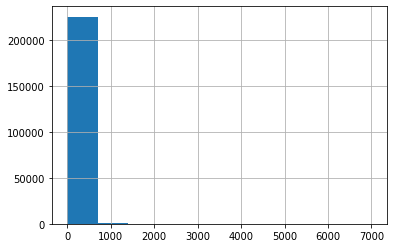

In [ ]:
Df.collection_recovery_fee.hist() 

In [ ]:
Df["Log_collection_recovery_fee"] = Df["collection_recovery_fee"].map(lambda i: np.log(i) if i > 0 else 0) 
print(Df['collection_recovery_fee'].skew())
print(Df['Log_collection_recovery_fee'].skew())

15.507962285720476
3.4374779446163384


In [ ]:
Df.shape

(227164, 36)

In [ ]:
Dfout=(Df < (Q1 - 1.5 * IQR)) |Df > (Q3 + 1.5 * IQR)
outliers=[]


for col in Df.columns :
    
    f=Dfout[col].value_counts(normalize=True)[0]*100
    outliers.append(f)
outliers

[100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 82.7340599742917,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 95.59613319011815,
 88.00294060678628,
 88.49333521156521,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 99.91856103960134,
 91.60166223521333,
 100.0,
 81.30513637724287,
 100.0,
 100.0,
 100.0,
 100.0]

In [ ]:
dataframe=pd.DataFrame({'variable':Df.columns,
                       'Non outliers': outliers})
dataframe

,variable,Non outliers
0,loan_amnt,100.000000
1,term,100.000000
2,int_rate,100.000000
3,installment,100.000000
4,grade,100.000000
5,sub_grade,100.000000
6,annual_inc,100.000000
7,dti,100.000000
8,delinq_2yrs,82.734060
9,inq_last_6mths,100.000000


# Derive Columns For Analysis

In [ ]:
Df['loan_amnt'].describe()

count    227164.000000
mean      13458.196721
std        8046.114564
min         500.000000
25%        7200.000000
50%       12000.000000
75%       18000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

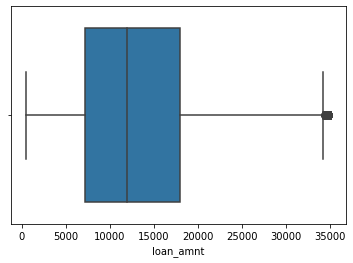

In [ ]:
sns.boxplot(Df.loan_amnt)

In [ ]:
print('Before Removal of Outliers :\n')
print(Df['annual_inc'].describe())

# Data cleaning
# Remove Outliers quantile .99 from Annual Income
# it will make it easier to visualize the plots.

Df = Df[Df["annual_inc"] < Df["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(Df["annual_inc"].describe())

Before Removal of Outliers :

count    2.271640e+05
mean     7.203359e+04
std      5.529386e+04
min      3.000000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.600000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64
After Removal of Outliers :
count    224889.000000
mean      69149.777295
std       34875.556137
min        3000.000000
25%       45000.000000
50%       61000.000000
75%       85000.000000
max      231252.000000
Name: annual_inc, dtype: float64


In [ ]:
Df.total_pymnt.describe()

count    224889.000000
mean      13484.031189
std        9273.230790
min           0.000000
25%        6490.140000
50%       11530.860000
75%       18115.550000
max       57777.579870
Name: total_pymnt, dtype: float64

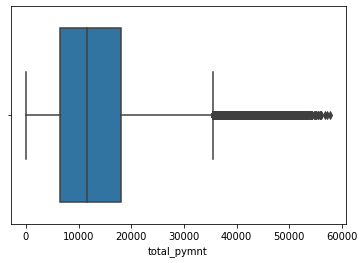

In [ ]:
sns.boxplot(Df.total_pymnt)

In [ ]:
Df['int_rate'].describe()

count    224889.000000
mean         13.768713
std           4.378915
min           5.420000
25%          10.740000
50%          13.610000
75%          16.400000
max          26.060000
Name: int_rate, dtype: float64

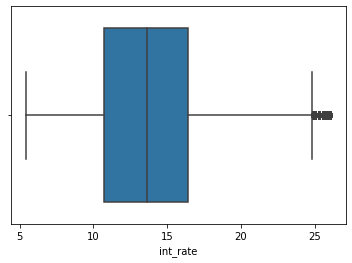

In [ ]:
sns.boxplot(Df.int_rate)

In [ ]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
Df['loan_amnt_cats'] = pd.cut(Df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=[1, 2, 3, 4, 5])
#'0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'
# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
Df['annual_inc_cats'] = pd.cut(Df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=[1, 2, 3, 4, 5])
#'0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'
# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
Df['int_rate_cats'] = pd.cut(Df['int_rate'], [0, 10, 12.5, 16, 20,float("inf")], labels=[1, 2, 3, 4,5])

# categorise dti into buckets for bivariate analysis.
Df['dti_cats'] = pd.cut(Df['dti'], [-float("inf"),0, 5, 10, 15, 20, 25, float("inf")], labels=[0,1, 2, 3, 4, 5,6])

# Univariate Analysis

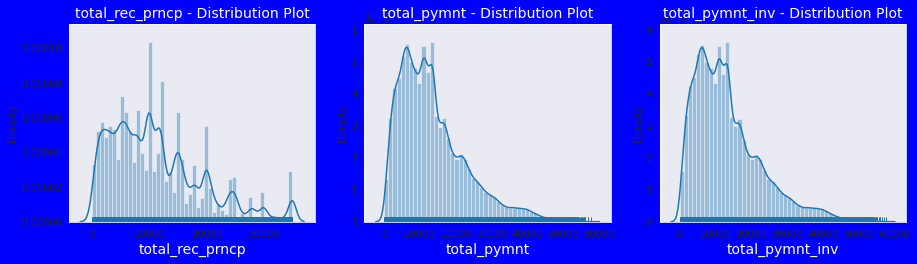

In [ ]:
# Lets see distribution of three variables fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(Df['total_rec_prncp'],rug = True)
ax.set_title('total_rec_prncp - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('total_rec_prncp',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(Df['total_pymnt'],rug = True)
ax.set_title('total_pymnt - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('total_pymnt',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(Df['total_pymnt_inv'],rug = True)
ax.set_title('total_pymnt_inv - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('total_pymnt_inv',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only total_pymnt column for rest of our analysis.


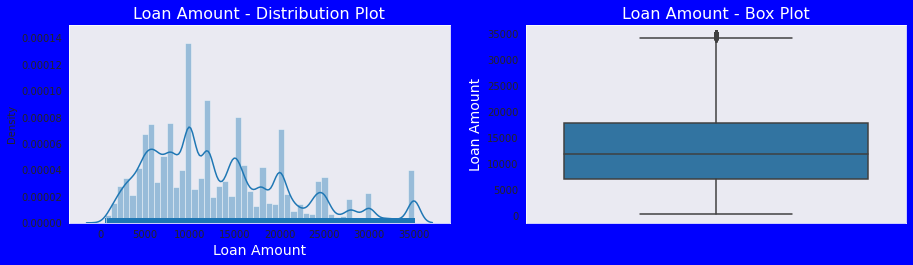

In [ ]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(Df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=Df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 7000 - 20000

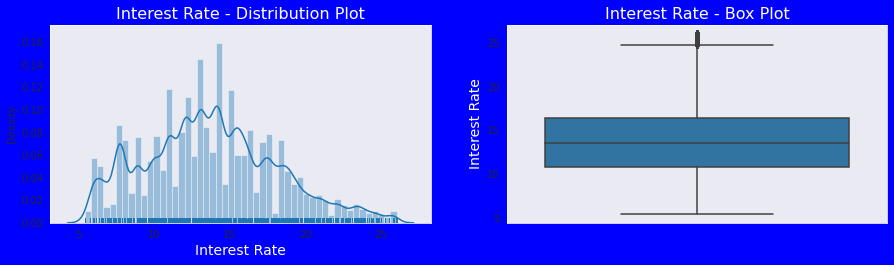

In [ ]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(Df['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=Df['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 17%

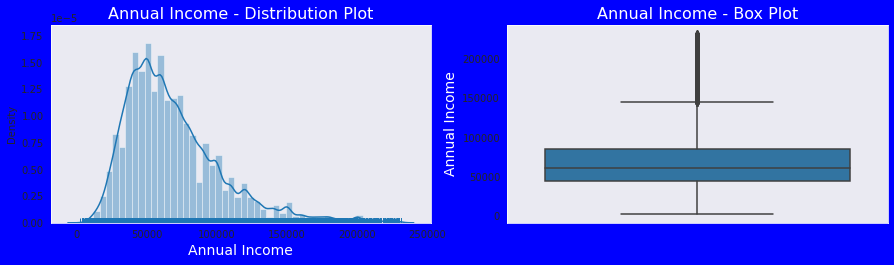

In [ ]:
plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(Df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=Df['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

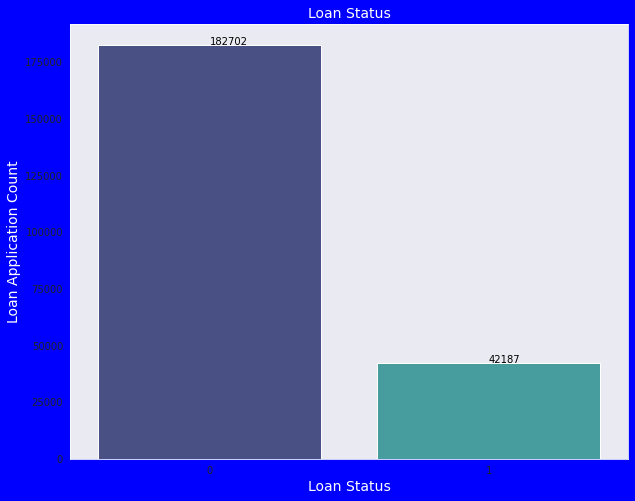

In [ ]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(10,8),facecolor='b')
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=Df,palette='mako')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')            
# To show count of values above bars
s=Df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

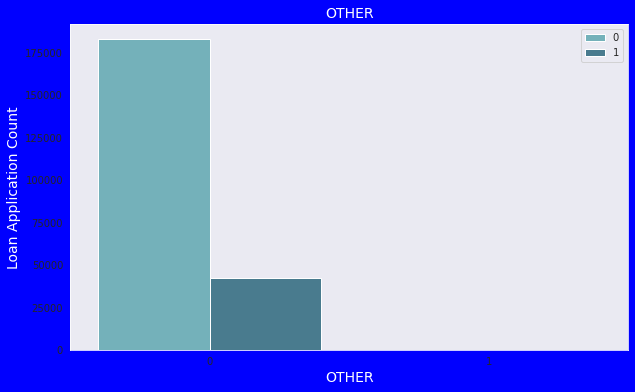

In [ ]:
# Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="OTHER",data=Df,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('OTHER',fontsize=14,color='w')
ax.set_xlabel('OTHER',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

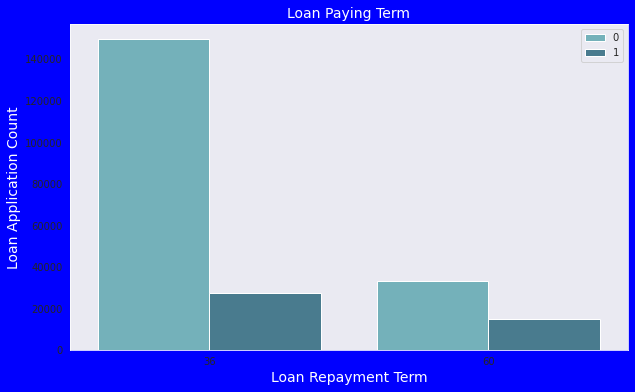

In [ ]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=Df,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [ ]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = Df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan[1] + inc_range_vs_loan[0] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan[1] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
#"Fully Paid": 0, "Charged Off": 1

# Income range 80000 + has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased. 

loan_status,annual_inc_cats,0,1,Total,Chargedoff_Proportion
0,1,2727,926,3653,0.253490
1,2,31456,9758,41214,0.236764
2,3,52990,13755,66745,0.206083
3,4,40540,8670,49210,0.176184
4,5,54989,9078,64067,0.141695


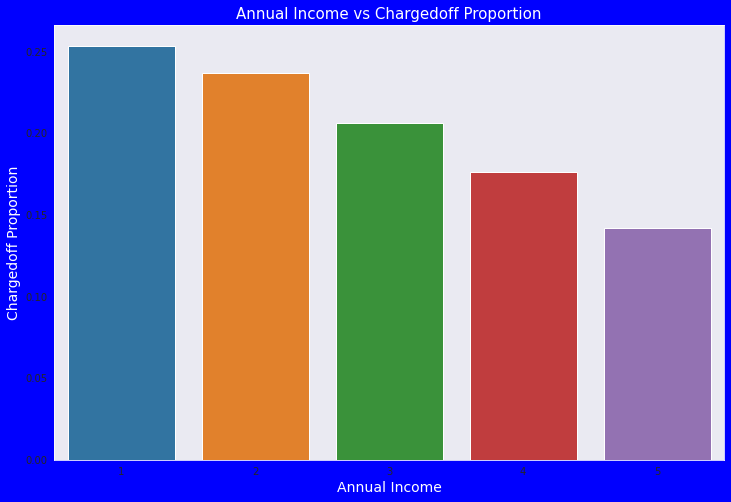

In [ ]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Annual Income vs Chargedoff Proportion',fontsize=15,color = 'w')
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
ax1.set_xlabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [ ]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = Df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan[1] + grade_vs_loan[0] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan[1] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged off is increasing with grade moving from "A" towards "G"

loan_status,grade,0,1,Total,Chargedoff_Proportion
6,7,888,713,1601,0.445347
5,6,3863,2662,6525,0.407969
4,5,10411,5667,16078,0.352469
3,4,25801,9683,35484,0.272884
2,3,45353,11847,57200,0.207115
1,2,60412,9099,69511,0.130900
0,1,35974,2516,38490,0.065368


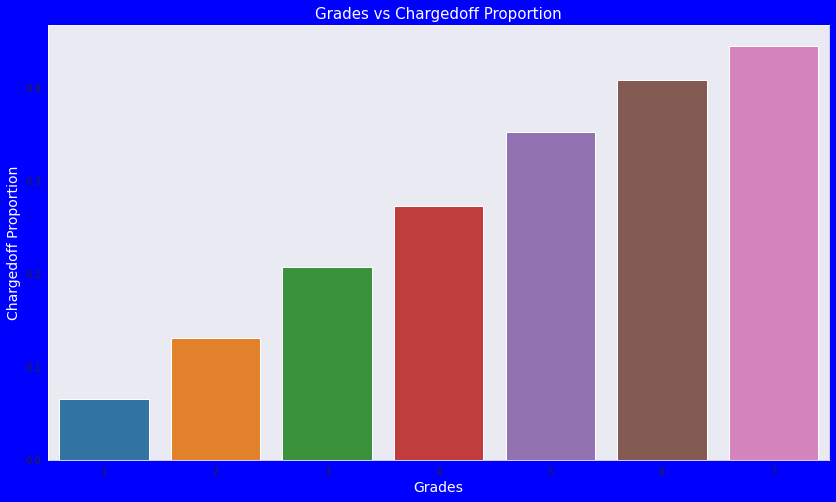

In [ ]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(14, 8),facecolor='b')
ax1.set_title('Grades vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_xlabel('Grades',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "A" has very less chances of charged off.
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [ ]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = Df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan[1] +  interest_vs_loan[0] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan[1] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

loan_status,int_rate_cats,0,1,Total,Chargedoff_Proportion
4,5,11758,7429,19187,0.387189
3,4,31799,12429,44228,0.281021
2,3,56371,13242,69613,0.190223
1,2,39111,5690,44801,0.127006
0,1,43663,3397,47060,0.072184


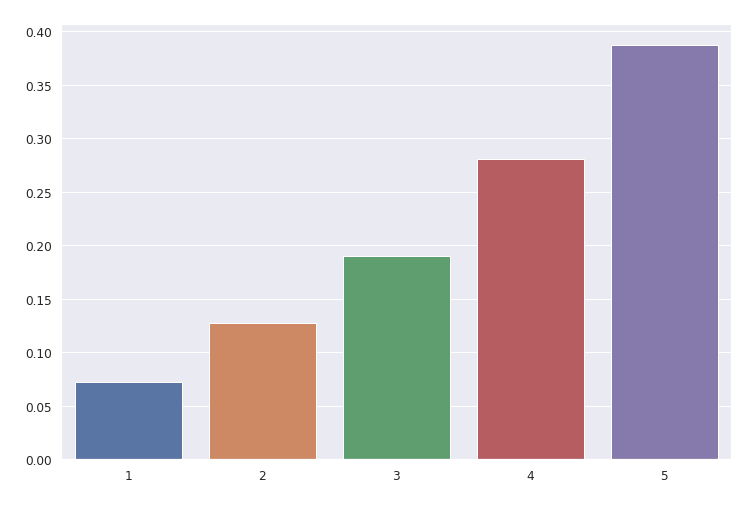

In [ ]:
# Lets draw some bar plots on data calculated above. Try to visualize the pattern to understand the data better.

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:
# interest rate less than 10% has very less chances of charged off. Intrest rates are starting from minimin 5 %.
# interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.
# Charged off proportion is increasing with higher intrest rates.

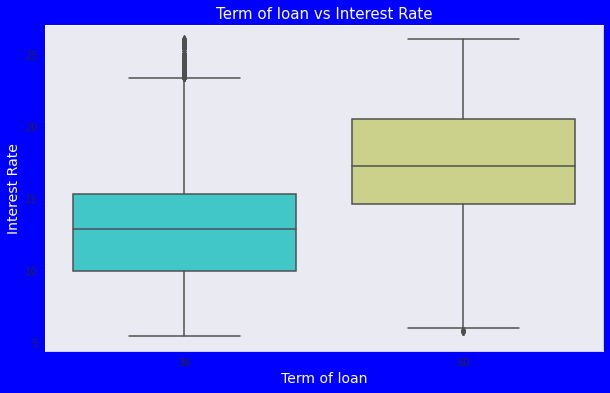

In [ ]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =Df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

# V-Cramer

In [ ]:
df2 = Df[[i for i in Df.columns if i in ('term',  'grade', 'MORTGAGE', 'OTHER', 'OWN', 'RENT','loan_amnt_cats','annual_inc_cats','int_rate_cats','dti_cats','loan_status')]]

df2.head()

,term,grade,MORTGAGE,OTHER,OWN,RENT,loan_status,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
466283,36,1,0,0,1,0,0,1,5,1,2
177297,36,1,1,0,0,0,0,2,4,1,3
311113,36,1,0,0,0,1,0,2,4,1,4
30252,36,1,1,0,0,0,0,1,3,1,1
177300,36,1,1,0,0,0,0,1,5,1,4


In [ ]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df2.columns :
      data_encoded[i]=label.fit_transform(df2[i])

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [ ]:
rows= []
for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,term,grade,MORTGAGE,OTHER,OWN,RENT,loan_status,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
term,1.00,0.23,0.01,0.00,0.00,0.01,0.03,0.16,0.02,0.20,0.00
grade,0.23,1.00,0.01,0.00,0.00,0.01,0.06,0.02,0.00,0.61,0.00
MORTGAGE,0.01,0.01,1.00,0.00,0.09,0.71,0.00,0.03,0.08,0.01,0.00
OTHER,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OWN,0.00,0.00,0.09,0.00,1.00,0.07,0.00,0.00,0.01,0.00,0.00
RENT,0.01,0.01,0.71,0.00,0.07,1.00,0.00,0.03,0.06,0.01,0.00
loan_status,0.03,0.06,0.00,0.00,0.00,0.00,1.00,0.00,0.01,0.06,0.01
loan_amnt_cats,0.16,0.02,0.03,0.00,0.00,0.03,0.00,1.00,0.06,0.02,0.00
annual_inc_cats,0.02,0.00,0.08,0.00,0.01,0.06,0.01,0.06,1.00,0.00,0.01
int_rate_cats,0.20,0.61,0.01,0.00,0.00,0.01,0.06,0.02,0.00,1.00,0.01


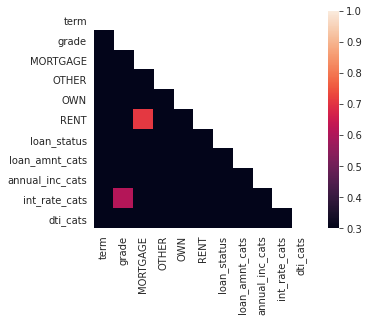

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0.3, vmax=1, square=True)

plt.show()

In [ ]:
Df.drop('int_rate_cats',axis=1, inplace=True)


# Calculation of information value

In [ ]:
Columns_IV=['term',  'grade', 'OTHER', 'OWN', 'RENT','loan_amnt_cats','annual_inc_cats','dti_cats','sub_grade']

In [ ]:
# Calculate information value
lst = []
def calc_iv(data, feature, target, pr=0):
    for i in range(data[feature].nunique()):
        val = list(data[feature].unique())[i]
        lst.append([feature, val, data[data[feature] == val].count()[feature], data[(data[feature] == val) & (data[target] == 1)].count()[feature]])

    data1 = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data1 = data1[data1['Bad'] > 0]
    data1['Share'] = data1['All'] / data1['All'].sum()
    data1['Bad Rate'] = data1['Bad'] / data1['All']
    data1['Distribution Good'] = (data1['All'] - data1['Bad']) / (data1['All'].sum() - data1['Bad'].sum())
    data1['Distribution Bad'] = data1['Bad'] / data1['Bad'].sum()
    data1['WoE'] = np.log(data1['Distribution Good'] / data1['Distribution Bad'])
    data1['IV'] = (data1['WoE'] * (data1['Distribution Good'] - data1['Distribution Bad'])).sum()
    data1 = data1.sort_values(by=['Variable', 'Value'], ascending=True)
    
    if pr == 1:
        print(data1)

    return data1['IV'].values[0]

In [ ]:
IV = [calc_iv(Df, feature, 'loan_status', pr=0) for feature in Columns_IV]
IV

[0.15488474798431862,
 0.27103560468295396,
 0.1806904101534828,
 0.1355915832654421,
 0.11101726068014495,
 0.09749804274773104,
 0.09134464183364252,
 0.09026079158417805,
 0.12667917062200207]

In [ ]:
dataframe=pd.DataFrame({'variable':Columns_IV,
                       'IV': IV})
dataframe

,variable,IV
0,term,0.154885
1,grade,0.271036
2,OTHER,0.180690
3,OWN,0.135592
4,RENT,0.111017
5,loan_amnt_cats,0.097498
6,annual_inc_cats,0.091345
7,dti_cats,0.090261
8,sub_grade,0.126679


In [ ]:
Df.drop('annual_inc_cats',axis=1, inplace=True)
Df.drop('loan_amnt_cats',axis=1, inplace=True)
Df.drop('dti_cats',axis=1, inplace=True)

##### ANOVA f-test Feature Selection

In [ ]:
Df.columns 

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'loan_status', 'log_delinq_2yrs',
       'Log_total_rec_late_fee', 'Log_recoveries',
       'Log_collection_recovery_fee'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#perform two-way ANOVA
model = ols('loan_status ~ loan_amnt + int_rate +  installment + annual_inc + dti + delinq_2yrs + inq_last_6mths + open_acc +revol_bal + revol_util + total_acc + out_prncp + out_prncp_inv+total_pymnt + total_pymnt_inv + total_rec_prncp + total_rec_int+total_rec_late_fee+ recoveries+ collection_recovery_fee+last_pymnt_amnt+ tot_coll_amt+ tot_cur_bal+ total_rev_hi_lim+log_delinq_2yrs+Log_total_rec_late_fee+ Log_recoveries+Log_collection_recovery_fee', data=Df).fit()
df_anova = sm.stats.anova_lm(model, typ=2)
df_anova

,sum_sq,df,F,PR(>F)
loan_amnt,1049.255522,1.0,27472.749908,0.000000e+00
int_rate,7.330988,1.0,191.947905,1.244862e-43
installment,53.516505,1.0,1401.227360,1.002737e-305
annual_inc,14.580552,1.0,381.763871,6.047852e-85
dti,11.916378,1.0,312.007583,8.895133e-70
delinq_2yrs,167.715695,1.0,4391.314834,0.000000e+00
inq_last_6mths,0.021675,1.0,0.567521,4.512465e-01
open_acc,1.278947,1.0,33.486790,7.184445e-09
revol_bal,1.230054,1.0,32.206604,1.387885e-08
revol_util,0.202050,1.0,5.290291,2.144554e-02


In [ ]:
test = df_anova[df_anova['PR(>F)'] > 0.05]
test

,sum_sq,df,F,PR(>F)
inq_last_6mths,0.021675,1.0,0.567521,0.451246
total_acc,0.024449,1.0,0.640155,0.423656
out_prncp,0.063923,1.0,1.673714,0.195763
out_prncp_inv,0.063923,1.0,1.673714,0.195763
total_pymnt,0.063558,1.0,1.664139,0.197047
total_rec_prncp,0.063580,1.0,1.664721,0.196968
total_rec_int,0.063556,1.0,1.664090,0.197053
total_rec_late_fee,0.065290,1.0,1.709493,0.191053
recoveries,0.063644,1.0,1.666389,0.196744
tot_coll_amt,0.008480,1.0,0.222026,0.637501


In [ ]:
AnovaListtodrop=test.index.tolist()
Df.drop(AnovaListtodrop, axis=1 , inplace= True )

In [ ]:
Df.columns 

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal',
       'revol_util', 'total_pymnt_inv', 'collection_recovery_fee',
       'last_pymnt_amnt', 'total_rev_hi_lim', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'loan_status', 'log_delinq_2yrs', 'Log_total_rec_late_fee',
       'Log_recoveries', 'Log_collection_recovery_fee'],
      dtype='object')

In [ ]:
Df.collection_recovery_fee.value_counts()

0.000000      198941
18.050148       3786
2.000000          15
1.880000          11
1.800000          11
               ...  
221.040000         1
17.689500          1
5.161800           1
8.165200           1
18.730600          1
Name: collection_recovery_fee, Length: 19652, dtype: int64

In [ ]:
Df.drop('Log_collection_recovery_fee', axis=1, inplace = True )
Df.drop('collection_recovery_fee', axis=1, inplace = True )
Df.drop('Log_recoveries', axis=1, inplace = True )

# Detecting Multicollinearity using VIF

In [ ]:
Df = Df[[ col for col in Df.columns if col != 'loan_status' ] + ['loan_status']]
Df

,loan_amnt,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_pymnt_inv,last_pymnt_amnt,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,log_delinq_2yrs,Log_total_rec_late_fee,loan_status
466283,2000,36,7.90,62.59,1,14,83000.0,5.39,3.0,21.0,11404.0,21.5,2126.58,1500.68,53100.000000,0,0,1,0,1.098612,0.0,0
177297,12000,36,7.90,375.49,1,14,64000.0,12.96,0.0,14.0,3232.0,12.0,13465.80,2952.08,27000.000000,1,0,0,0,0.000000,0.0,0
311113,14000,36,7.12,433.05,1,13,62525.0,16.56,0.0,8.0,18780.0,74.2,14968.79,1906.09,25300.000000,0,0,0,1,0.000000,0.0,0
30252,1500,36,7.14,46.41,1,13,45000.0,4.80,0.0,5.0,5588.0,39.1,1670.54,49.42,29225.523015,1,0,0,0,0.000000,0.0,0
177300,2600,36,6.62,79.83,1,12,120000.0,16.67,0.0,17.0,19607.0,22.4,2848.47,938.71,87430.000000,1,0,0,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281062,10000,60,25.83,298.40,7,72,52000.0,12.49,0.0,5.0,5124.0,78.8,1477.65,298.40,6500.000000,0,0,0,1,0.000000,0.0,1
130080,25200,60,24.89,738.03,7,73,86000.0,21.43,0.0,33.0,23734.0,18.8,32934.91,21902.83,126500.000000,1,0,0,0,0.000000,0.0,0
280969,30000,60,25.80,894.67,7,71,91000.0,21.83,1.0,13.0,12506.0,47.7,8303.66,894.67,26200.000000,1,0,0,0,0.000000,0.0,1
221954,30000,60,24.33,868.80,7,72,135000.0,11.24,1.0,12.0,41592.0,95.8,33014.40,868.80,29225.523015,0,0,0,1,0.000000,0.0,1


In [ ]:
Df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal',
       'revol_util', 'total_pymnt_inv', 'last_pymnt_amnt', 'total_rev_hi_lim',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'log_delinq_2yrs',
       'Log_total_rec_late_fee', 'loan_status'],
      dtype='object')

In [ ]:
Df2=Df[[  'term', 'int_rate', 'loan_amnt',
       'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal',
       'revol_util', 'total_pymnt_inv', 'last_pymnt_amnt', 'total_rev_hi_lim',
       'MORTGAGE', 'OTHER', 'OWN', 'RENT', 'log_delinq_2yrs',
       'Log_total_rec_late_fee', 'loan_status']]
Df.drop('grade', axis=1, inplace = True )

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = Df2.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,term,1.525786
1,int_rate,1.588244
2,loan_amnt,4.019771
3,annual_inc,1.642586
4,dti,1.383522
5,delinq_2yrs,1.826840
6,open_acc,1.367145
7,revol_bal,2.843775
8,revol_util,1.608022
9,total_pymnt_inv,4.522652


In [ ]:
#VIF starts at 1 and has no upper limit
#VIF = 1, no correlation between the independent variable and the other variables
#VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In [ ]:
df_vif=calc_vif(X)
df_v=df_vif.VIF>10
df_vif[df_v]

,variables,VIF
12,MORTGAGE,20.477676
15,RENT,16.494472


In [ ]:
Df.drop('installment', axis=1, inplace = True )
Df.drop('sub_grade', axis=1, inplace = True )

In [ ]:
df_vif=calc_vif(X)
df_v=df_vif.VIF<10
df_vif[df_v]


,variables,VIF
0,term,1.525786
1,int_rate,1.588244
2,loan_amnt,4.019771
3,annual_inc,1.642586
4,dti,1.383522
5,delinq_2yrs,1.826840
6,open_acc,1.367145
7,revol_bal,2.843775
8,revol_util,1.608022
9,total_pymnt_inv,4.522652


# Corrolation

In [ ]:
Df.columns 

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'open_acc', 'revol_bal', 'revol_util', 'total_pymnt_inv',
       'last_pymnt_amnt', 'total_rev_hi_lim', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'log_delinq_2yrs', 'Log_total_rec_late_fee', 'loan_status'],
      dtype='object')

In [ ]:
Df = Df.apply(pd.to_numeric)
Df

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_pymnt_inv,last_pymnt_amnt,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,log_delinq_2yrs,Log_total_rec_late_fee,loan_status
466283,2000,36,7.90,83000.0,5.39,3.0,21.0,11404.0,21.5,2126.58,1500.68,53100.000000,0,0,1,0,1.098612,0.0,0
177297,12000,36,7.90,64000.0,12.96,0.0,14.0,3232.0,12.0,13465.80,2952.08,27000.000000,1,0,0,0,0.000000,0.0,0
311113,14000,36,7.12,62525.0,16.56,0.0,8.0,18780.0,74.2,14968.79,1906.09,25300.000000,0,0,0,1,0.000000,0.0,0
30252,1500,36,7.14,45000.0,4.80,0.0,5.0,5588.0,39.1,1670.54,49.42,29225.523015,1,0,0,0,0.000000,0.0,0
177300,2600,36,6.62,120000.0,16.67,0.0,17.0,19607.0,22.4,2848.47,938.71,87430.000000,1,0,0,0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281062,10000,60,25.83,52000.0,12.49,0.0,5.0,5124.0,78.8,1477.65,298.40,6500.000000,0,0,0,1,0.000000,0.0,1
130080,25200,60,24.89,86000.0,21.43,0.0,33.0,23734.0,18.8,32934.91,21902.83,126500.000000,1,0,0,0,0.000000,0.0,0
280969,30000,60,25.80,91000.0,21.83,1.0,13.0,12506.0,47.7,8303.66,894.67,26200.000000,1,0,0,0,0.000000,0.0,1
221954,30000,60,24.33,135000.0,11.24,1.0,12.0,41592.0,95.8,33014.40,868.80,29225.523015,0,0,0,1,0.000000,0.0,1


In [ ]:
cols1 = [ 'int_rate', 'loan_status', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util',
       'last_pymnt_amnt', 'total_rev_hi_lim', 'log_delinq_2yrs', 'Log_total_rec_late_fee']
Df[cols1] = Df[cols1].apply(pd.to_numeric)

In [ ]:
def HighlyCorrelated (Df, thresh=.7):
    couples = set()
    for col1 in list(Df.corr().columns):
        for col2 in list(Df.corr().columns):
            if col1 != col2 and abs(Df.corr()[col1][col2])>=thresh:
                if (col2, col1) not in couples:
                    couples.add((col1, col2))
            
    return couples
        
HighlyCorrelated (Df)

{('MORTGAGE', 'RENT'), ('loan_amnt', 'total_pymnt_inv')}

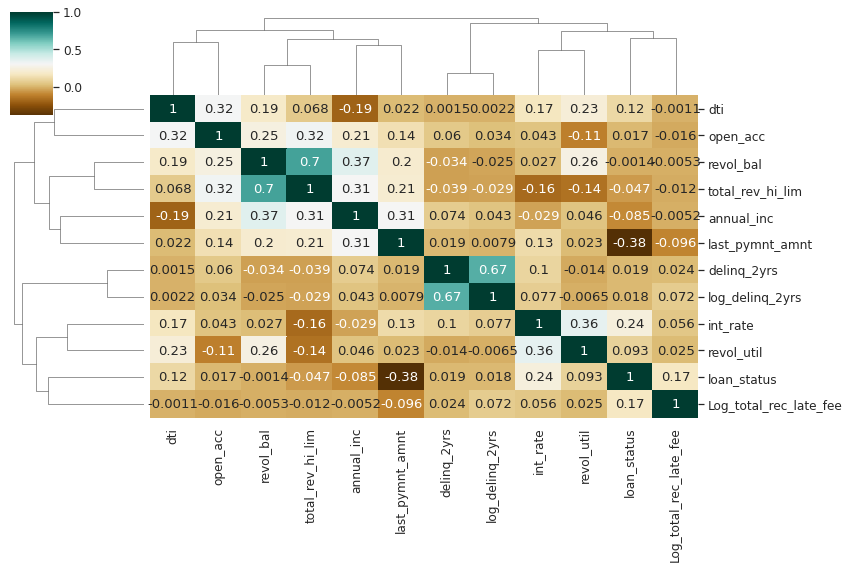

In [ ]:
loan_correlation = Df[cols1].corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12,8),cmap="BrBG")
plt.show()

In [ ]:
Df.drop('total_pymnt_inv', axis=1, inplace = True )

In [ ]:
len(Df.columns)

18

In [ ]:
Df.columns

Index(['loan_amnt', 'term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'open_acc', 'revol_bal', 'revol_util', 'last_pymnt_amnt',
       'total_rev_hi_lim', 'MORTGAGE', 'OTHER', 'OWN', 'RENT',
       'log_delinq_2yrs', 'Log_total_rec_late_fee', 'loan_status'],
      dtype='object')

In [ ]:
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts. 
# That means when annual income is low DTI is high & vice versa.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

In [ ]:
Df.to_csv("Modelisation_Table.csv",index=False)

# Logistic Regression

In [20]:
data = pd.read_csv('C:\\Users\\Mkarry\\Modelisation_Table.csv', sep =",")

In [21]:
data.head(2)

,loan_amnt,term,int_rate,grade,annual_inc,dti,delinq_2yrs,open_acc,revol_bal,revol_util,total_pymnt_inv,last_pymnt_amnt,total_rev_hi_lim,MORTGAGE,OTHER,OWN,RENT,log_delinq_2yrs,Log_total_rec_late_fee,loan_status
0,2000,36,7.9,1,83000.0,5.39,3.0,21.0,11404.0,21.5,2126.58,1500.68,53100.0,0,0,1,0,1.098612,0.0,0
1,12000,36,7.9,1,64000.0,12.96,0.0,14.0,3232.0,12.0,13465.80,2952.08,27000.0,1,0,0,0,0.000000,0.0,0


In [22]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'revol_bal', 'revol_util', 'total_pymnt_inv',
       'last_pymnt_amnt', 'total_rev_hi_lim', 'MORTGAGE', 'OTHER', 'OWN',
       'RENT', 'log_delinq_2yrs', 'Log_total_rec_late_fee', 'loan_status'],
      dtype='object')

In [23]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x = data[['term', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'open_acc', 'revol_bal', 'revol_util', 'last_pymnt_amnt',
       'total_rev_hi_lim', 'OTHER', 'OWN', 'RENT',
       'log_delinq_2yrs', 'Log_total_rec_late_fee']]
y = data['loan_status']

x_train,x_test,y_train,y_test_logreg = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred_log_reg  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test_logreg)))
print("Accuracy={:.2f}".format(logreg.score(x_train, y_train)))

Accuracy=0.86
Accuracy=0.86


<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

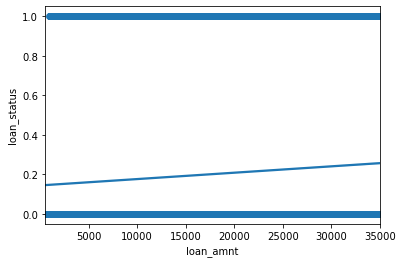

In [28]:

import seaborn as sns
sns.regplot(x='loan_amnt',y='loan_status',data=data)

# Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

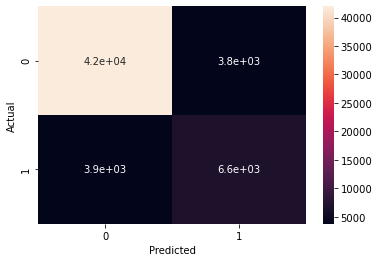

In [30]:
confusion_matrix_logreg = pd.crosstab(y_test_logreg, y_pred_log_reg, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_logreg, annot=True)

# Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test_logreg,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     45724
           1       0.64      0.63      0.64     10499

    accuracy                           0.86     56223
   macro avg       0.78      0.78      0.78     56223
weighted avg       0.86      0.86      0.86     56223



# validation matrix for classification in roc / auc

In [33]:
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [35]:
logistic_fpr,logistic_tpr,threshold = roc_curve(y_test_logreg,y_pred_log_reg)
auc_logistic = auc(logistic_fpr,logistic_tpr)

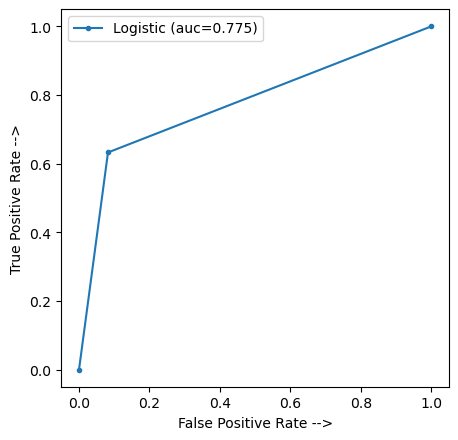

In [36]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(logistic_fpr,logistic_tpr, marker='.',label="Logistic (auc=%0.3f)" %auc_logistic)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Cross validation using K fold for three machine learning techniques 

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
models = [('logistic regression', LogisticRegression()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier())]
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)# random_state=123456,shuffle=True
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #print(classification_report)

logistic regression: 0.970341 (0.010239)
RF: 0.980079 (0.008647)
[00:05:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:0

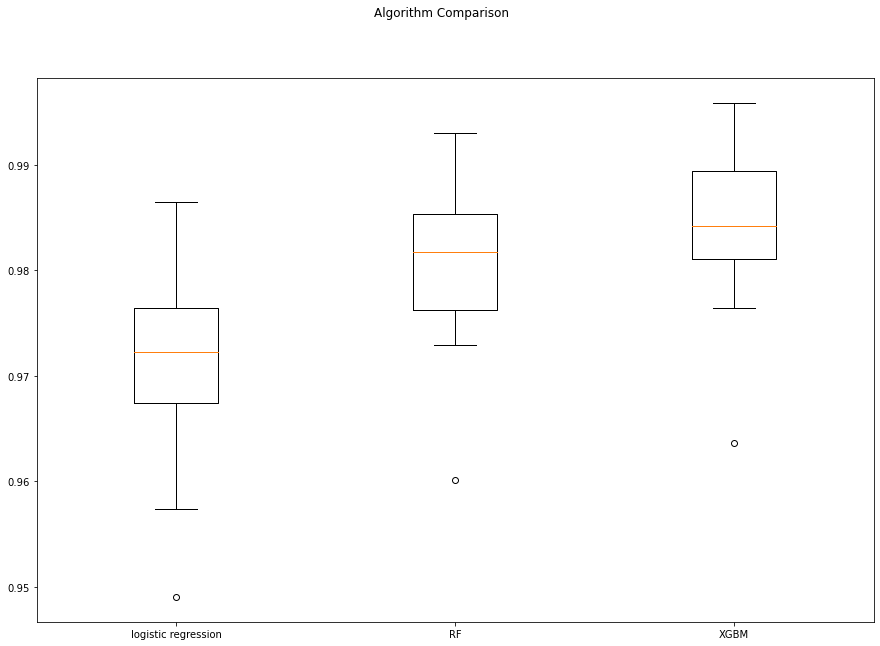

In [12]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [37]:
#Using cross validation technique (k fold =10 ) we obtain the best accuracy using XGBoost model with 0.98357 then the random forest with an accuracy of 0.98 and the third place is the logistic regression with an accuracy of 0.97.